In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing the Data

In [43]:
data = pd.read_csv(r"C:\Users\Dell G3\Desktop\Project\Coursera projects\All_Leagues_Dataset_(2016-2020).csv")
data.head() 

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


# EDA :

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     626 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

In [45]:
data.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


In [46]:
data.isna().sum()

Country                     0
League                      0
Club                       34
Player Names                0
Matches_Played              0
Substitution                0
Mins                        0
Goals                       0
xG                          0
xG Per Avg Match            0
Shots                       0
OnTarget                    0
Shots Per Avg Match         0
On Target Per Avg Match     0
Year                        0
dtype: int64

In [47]:
null_rows = data[data.isnull().any(axis=1)]
print(null_rows)

          Country                          League Club         Player Names  \
10          Spain                         La Liga  NaN              Aduriz    
51        Germany                      Bundesliga  NaN          Mario Gomez   
82         Brazil  Campeonato Brasileiro SÃ©rie A  NaN             Robinho    
83         Brazil  Campeonato Brasileiro SÃ©rie A  NaN              Kempes    
85         Brazil  Campeonato Brasileiro SÃ©rie A  NaN        Bruno Rangel    
89         Brazil  Campeonato Brasileiro SÃ©rie A  NaN             Grafite    
92         Brazil  Campeonato Brasileiro SÃ©rie A  NaN                Sassa   
96         Brazil  Campeonato Brasileiro SÃ©rie A  NaN     Kleber Gladiador   
97         Brazil  Campeonato Brasileiro SÃ©rie A  NaN             Pottker    
98         Brazil  Campeonato Brasileiro SÃ©rie A  NaN      Jonathan Copete   
104         Spain                         La Liga  NaN         Rodrigo None   
149       Germany                      Bundesliga  N

## Data Cleaning:

for cleaning purposes we will change the brazillian league name

In [48]:
leagues = data["League"].unique().tolist()
print(leagues)

['La Liga', 'Serie A', 'Bundesliga', 'Premier League', 'Campeonato Brasileiro SÃ©rie A', 'France Ligue 11', 'France Ligue 20', 'France Ligue 2', 'France Ligue 12', 'France Ligue 9', 'France Ligue 15', 'France Ligue 6', 'France Ligue 3', 'France Ligue 16', 'France Ligue 14', 'France Ligue 4', 'France Ligue 1', 'France Ligue 10', 'France Ligue 7', 'France Ligue 13', 'France Ligue 8', 'France Ligue 5', 'France Ligue 19', 'France Ligue 18', 'France Ligue 17', 'MLS', 'Primeira Liga', 'Eredivisie']


In [49]:
df = data.copy()
df.loc[data["Country"] == "Brazil", "League"] = "Campeonato Brasileiro Serie A"

print(df.loc[data["Country"] == "Brazil", "League"].head())

80    Campeonato Brasileiro Serie A
81    Campeonato Brasileiro Serie A
82    Campeonato Brasileiro Serie A
83    Campeonato Brasileiro Serie A
84    Campeonato Brasileiro Serie A
Name: League, dtype: object


In [50]:
Clubs = data["Club"].unique().tolist()
print(Clubs)

['(BET)', '(BAR)', '(ATL)', '(CAR)', '(VAL)', '(JUV)', '(RMA)', '(PSG)', '(CEL)', '(EIB)', nan, '(HUE)', '(VIL)', '(MON)', '(SOC)', 'Florin', '(LIV)', '(SAS)', '(LAZ)', '(VER)', '(NAP)', '(ATA)', '(FIO)', '(BEN)', '(CAG)', '(CRZ)', 'Cyril', '(ROM)', '(SAM)', 'Marco', '(IMI)', '(TOR)', '(HKI)', '(BMG)', '(BAY)', 'Sandro', '(HOF)', '(FCA)', '(RBL)', '(CHE)', '(SCF)', '(SCH)', '(WOB)', '(MAI)', '(ARS)', '(STP)', '(UNB)', '(LAG)', '(KOL)', '(GRO)', '(INT)', '(TOT)', '(LEI)', '(CRY)', '(MNC)', '(RAN)', '(WHU)', '(ACM)', '(BOU)', '(GRE)', '(SAP)', '(CEA)', '(SAN)', '(HUR)', '(BOT)', '(FLA)', '(CAM)', '(FLU)', '(CFC)', '(GET)', '(LEV)', '(GIR)', '(SEV)', '(PAR)', '(UDI)', '(SVW)', '(DOR)', '(NAN)', '(VfB)', '(OPE)', '(CRU)', '(FOR)', '(COR)', '(SCR)', '(BIL)', '(OSA)', '(ESP)', '(GRA)', 'Mario', '(BSC)', '(BOR)', '(CAE)', '(LIL)', '(REN)', '(MNU)', '(ANG)', '(SIV)', '(MAR)', '(STE)', '(GAL)', '(MPE)', '(LYO)', '(STR)', '(LOK)', '(BUR)', '(WAT)', '(EVE)', '(NEW)', '(WOL)', '(ALA)', '(VDG)', '(

In [51]:
print(df.loc[pd.isnull(df["Club"]), :])

          Country                         League Club         Player Names  \
10          Spain                        La Liga  NaN              Aduriz    
51        Germany                     Bundesliga  NaN          Mario Gomez   
82         Brazil  Campeonato Brasileiro Serie A  NaN             Robinho    
83         Brazil  Campeonato Brasileiro Serie A  NaN              Kempes    
85         Brazil  Campeonato Brasileiro Serie A  NaN        Bruno Rangel    
89         Brazil  Campeonato Brasileiro Serie A  NaN             Grafite    
92         Brazil  Campeonato Brasileiro Serie A  NaN                Sassa   
96         Brazil  Campeonato Brasileiro Serie A  NaN     Kleber Gladiador   
97         Brazil  Campeonato Brasileiro Serie A  NaN             Pottker    
98         Brazil  Campeonato Brasileiro Serie A  NaN      Jonathan Copete   
104         Spain                        La Liga  NaN         Rodrigo None   
149       Germany                     Bundesliga  NaN       Sand

We will replace the null values in the club column

In [52]:
club_counts = df.fillna('Unknown').groupby("Club")["Player Names"].count()
print(club_counts)

Club
(ACM)       5
(AJA)       8
(ALA)       4
(ANG)       2
(ARS)       6
           ..
Mario       1
Sandro      1
Santi       1
Tim         1
Unknown    34
Name: Player Names, Length: 180, dtype: int64


In [53]:
clubs_league = df.fillna('Unknown').groupby(["League", "Club"])["Player Names"].count()
print(clubs_league)

League      Club   
Bundesliga  (ACM)       1
            (ARS)       2
            (BAY)      10
            (BMG)       6
            (BOT)       1
                       ..
Serie A     (VIL)       1
            Cyril       1
            Marco       1
            Mario       1
            Unknown     2
Name: Player Names, Length: 270, dtype: int64


In [54]:
most_frequent_club = df.groupby('League')['Club'].agg(lambda x: x.value_counts().idxmax())
most_frequent_club

League
Bundesliga                       (BAY)
Campeonato Brasileiro Serie A    (FLA)
Eredivisie                       (AJA)
France Ligue 1                   (PSG)
France Ligue 10                  (STE)
France Ligue 11                  (PSG)
France Ligue 12                  (CAE)
France Ligue 13                  (MPE)
France Ligue 14                  (SIV)
France Ligue 15                  (REN)
France Ligue 16                  (ANG)
France Ligue 17                  (LOK)
France Ligue 18                  (STR)
France Ligue 19                  (LYO)
France Ligue 2                   (ARS)
France Ligue 20                  (BOR)
France Ligue 3                   (MNU)
France Ligue 4                   (MAR)
France Ligue 5                   (LYO)
France Ligue 6                   (PSG)
France Ligue 7                   (GAL)
France Ligue 8                   (MPE)
France Ligue 9                   (LIL)
La Liga                          (SOC)
MLS                              (SOU)
Premier League    

In [55]:
df["Club"].fillna('No Identified Club')
df.isna().sum()

Country                     0
League                      0
Club                       34
Player Names                0
Matches_Played              0
Substitution                0
Mins                        0
Goals                       0
xG                          0
xG Per Avg Match            0
Shots                       0
OnTarget                    0
Shots Per Avg Match         0
On Target Per Avg Match     0
Year                        0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     626 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

### Finding Outliers:

Analysis on xG Per Avg Match 

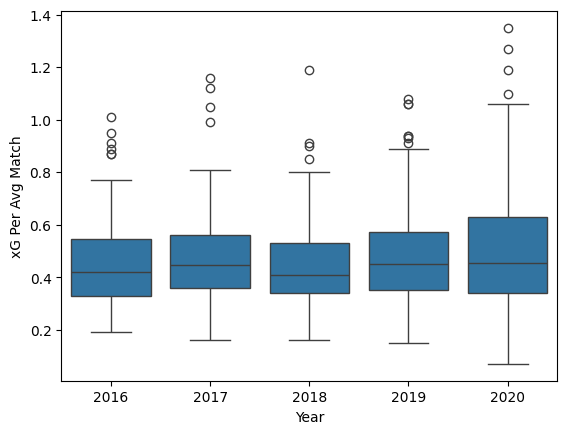

In [57]:
sns.boxplot(x = df["Year"], y = df["xG Per Avg Match"])
plt.show()

In [58]:
df["xG Per Avg Match"].sort_values(ascending=False)[:2]

sorted_df = df.sort_values(by="xG Per Avg Match", ascending=False).groupby("Player Names")["xG Per Avg Match"].sum()

sorted_df.sort_values(ascending=False)[:2]


Player Names
Robert Lewandowski    5.19
Cristiano Ronaldo     4.87
Name: xG Per Avg Match, dtype: float64

In [59]:
cr7 = df[df["Player Names"] == "Cristiano Ronaldo"].groupby("Year")["xG Per Avg Match"].max()

ln10 = df[df["Player Names"] == "Lionel Messi"].groupby("Year")["xG Per Avg Match"].max()

print("RONALDO:")
print(cr7)

print("\nMESSI:")
print(ln10)


RONALDO:
Year
2016    0.89
2017    1.16
2018    0.72
2019    0.83
2020    1.27
Name: xG Per Avg Match, dtype: float64

MESSI:
Year
2016    0.87
2017    0.99
2018    0.85
2019    0.67
2020    0.63
Name: xG Per Avg Match, dtype: float64


Analysis on Goals 

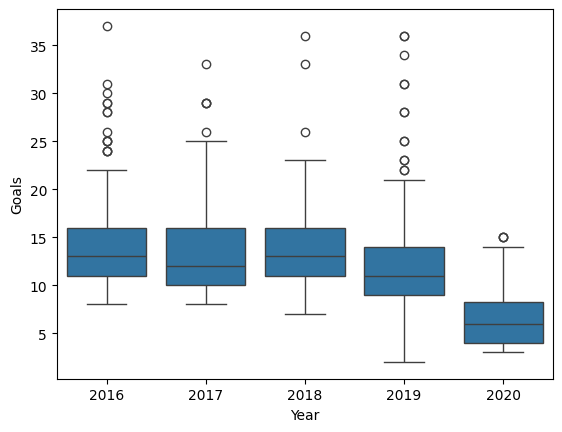

In [60]:
sns.boxplot(x = df["Year"], y = df["Goals"])
plt.show()

In [61]:
df["Goals"].sort_values(ascending=False)[:2]

sorted_df = df.sort_values(by="Goals", ascending=False).groupby("Player Names")["Goals"].sum()

sorted_df.sort_values(ascending=False)[:2]

Player Names
Lionel Messi          135
Robert Lewandowski    127
Name: Goals, dtype: int64

In [62]:
cr7 = df[df["Player Names"] == "Cristiano Ronaldo"].groupby("Year")["Goals"].max()

ln10 = df[df["Player Names"] == "Lionel Messi"].groupby("Year")["Goals"].max()

print("RONALDO:")
print(cr7)

print("\nMESSI:")
print(ln10)

RONALDO:
Year
2016    25
2017    26
2018    21
2019    31
2020     8
Name: Goals, dtype: int64

MESSI:
Year
2016    37
2017    33
2018    36
2019    25
2020     4
Name: Goals, dtype: int64


Comparison of Expected Goals xG, Goals and Matches Played for Both Cristiano Ronaldo and Lionel Messi

In [63]:
goats = df[(df["Player Names"] == "Cristiano Ronaldo") | (df["Player Names"] == "Lionel Messi")].groupby("Player Names")[["Goals", "xG", "Matches_Played"]].agg(np.sum)
goats

C:\Users\Dell G3\AppData\Local\Temp\ipykernel_21696\3011602294.py:1: FutureWarning: The provided callable <function sum at 0x000002D87CFAAAC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  goats = df[(df["Player Names"] == "Cristiano Ronaldo") | (df["Player Names"] == "Lionel Messi")].groupby("Player Names")[["Goals", "xG", "Matches_Played"]].agg(np.sum)


,Goals,xG,Matches_Played
Player Names,,,
Cristiano Ronaldo,111,107.96,124
Lionel Messi,135,111.77,133


In [64]:
years = df["Year"].unique().tolist()
years

[2016, 2017, 2018, 2019, 2020]

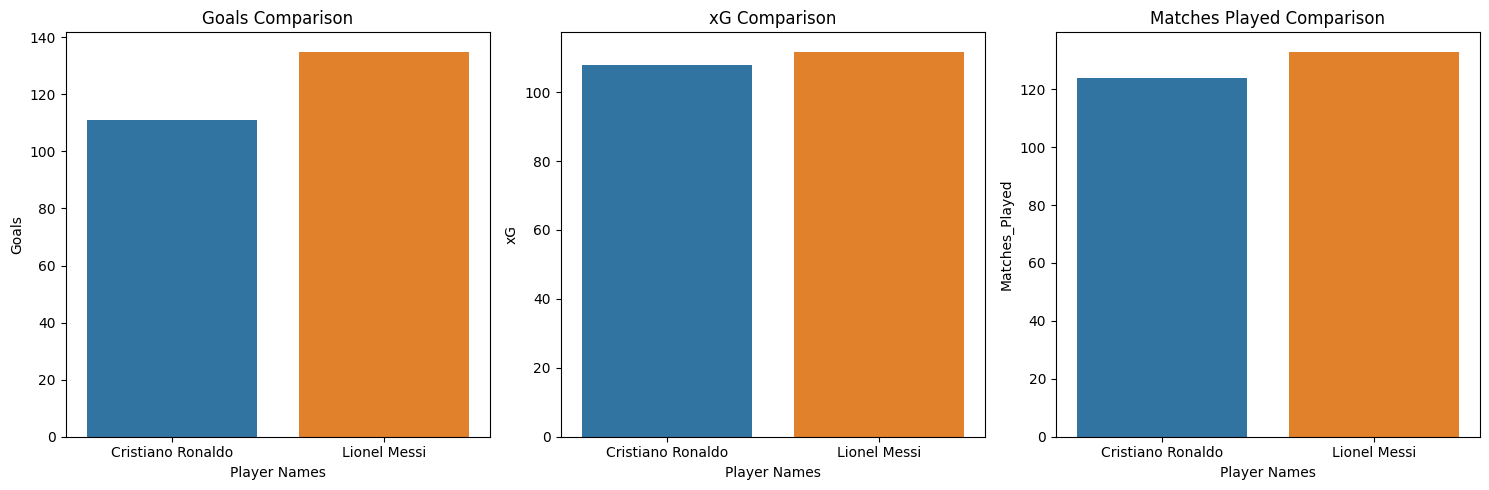

In [65]:
# Set up the plot
plt.figure(figsize=(15, 5))

# Plot for Goals
plt.subplot(1, 3, 1)
sns.barplot(x="Player Names", y="Goals", hue = "Player Names", data=goats)
plt.title("Goals Comparison")

# Plot for xG
plt.subplot(1, 3, 2)
sns.barplot(x="Player Names", y="xG", hue = "Player Names", data=goats)
plt.title("xG Comparison")

# Plot for Matches Played
plt.subplot(1, 3, 3)
sns.barplot(x="Player Names", y="Matches_Played", hue = "Player Names", data=goats)
plt.title("Matches Played Comparison")

# Show the plots
plt.tight_layout()
plt.show()

# Feature Engineering :

### Feature Transformation 

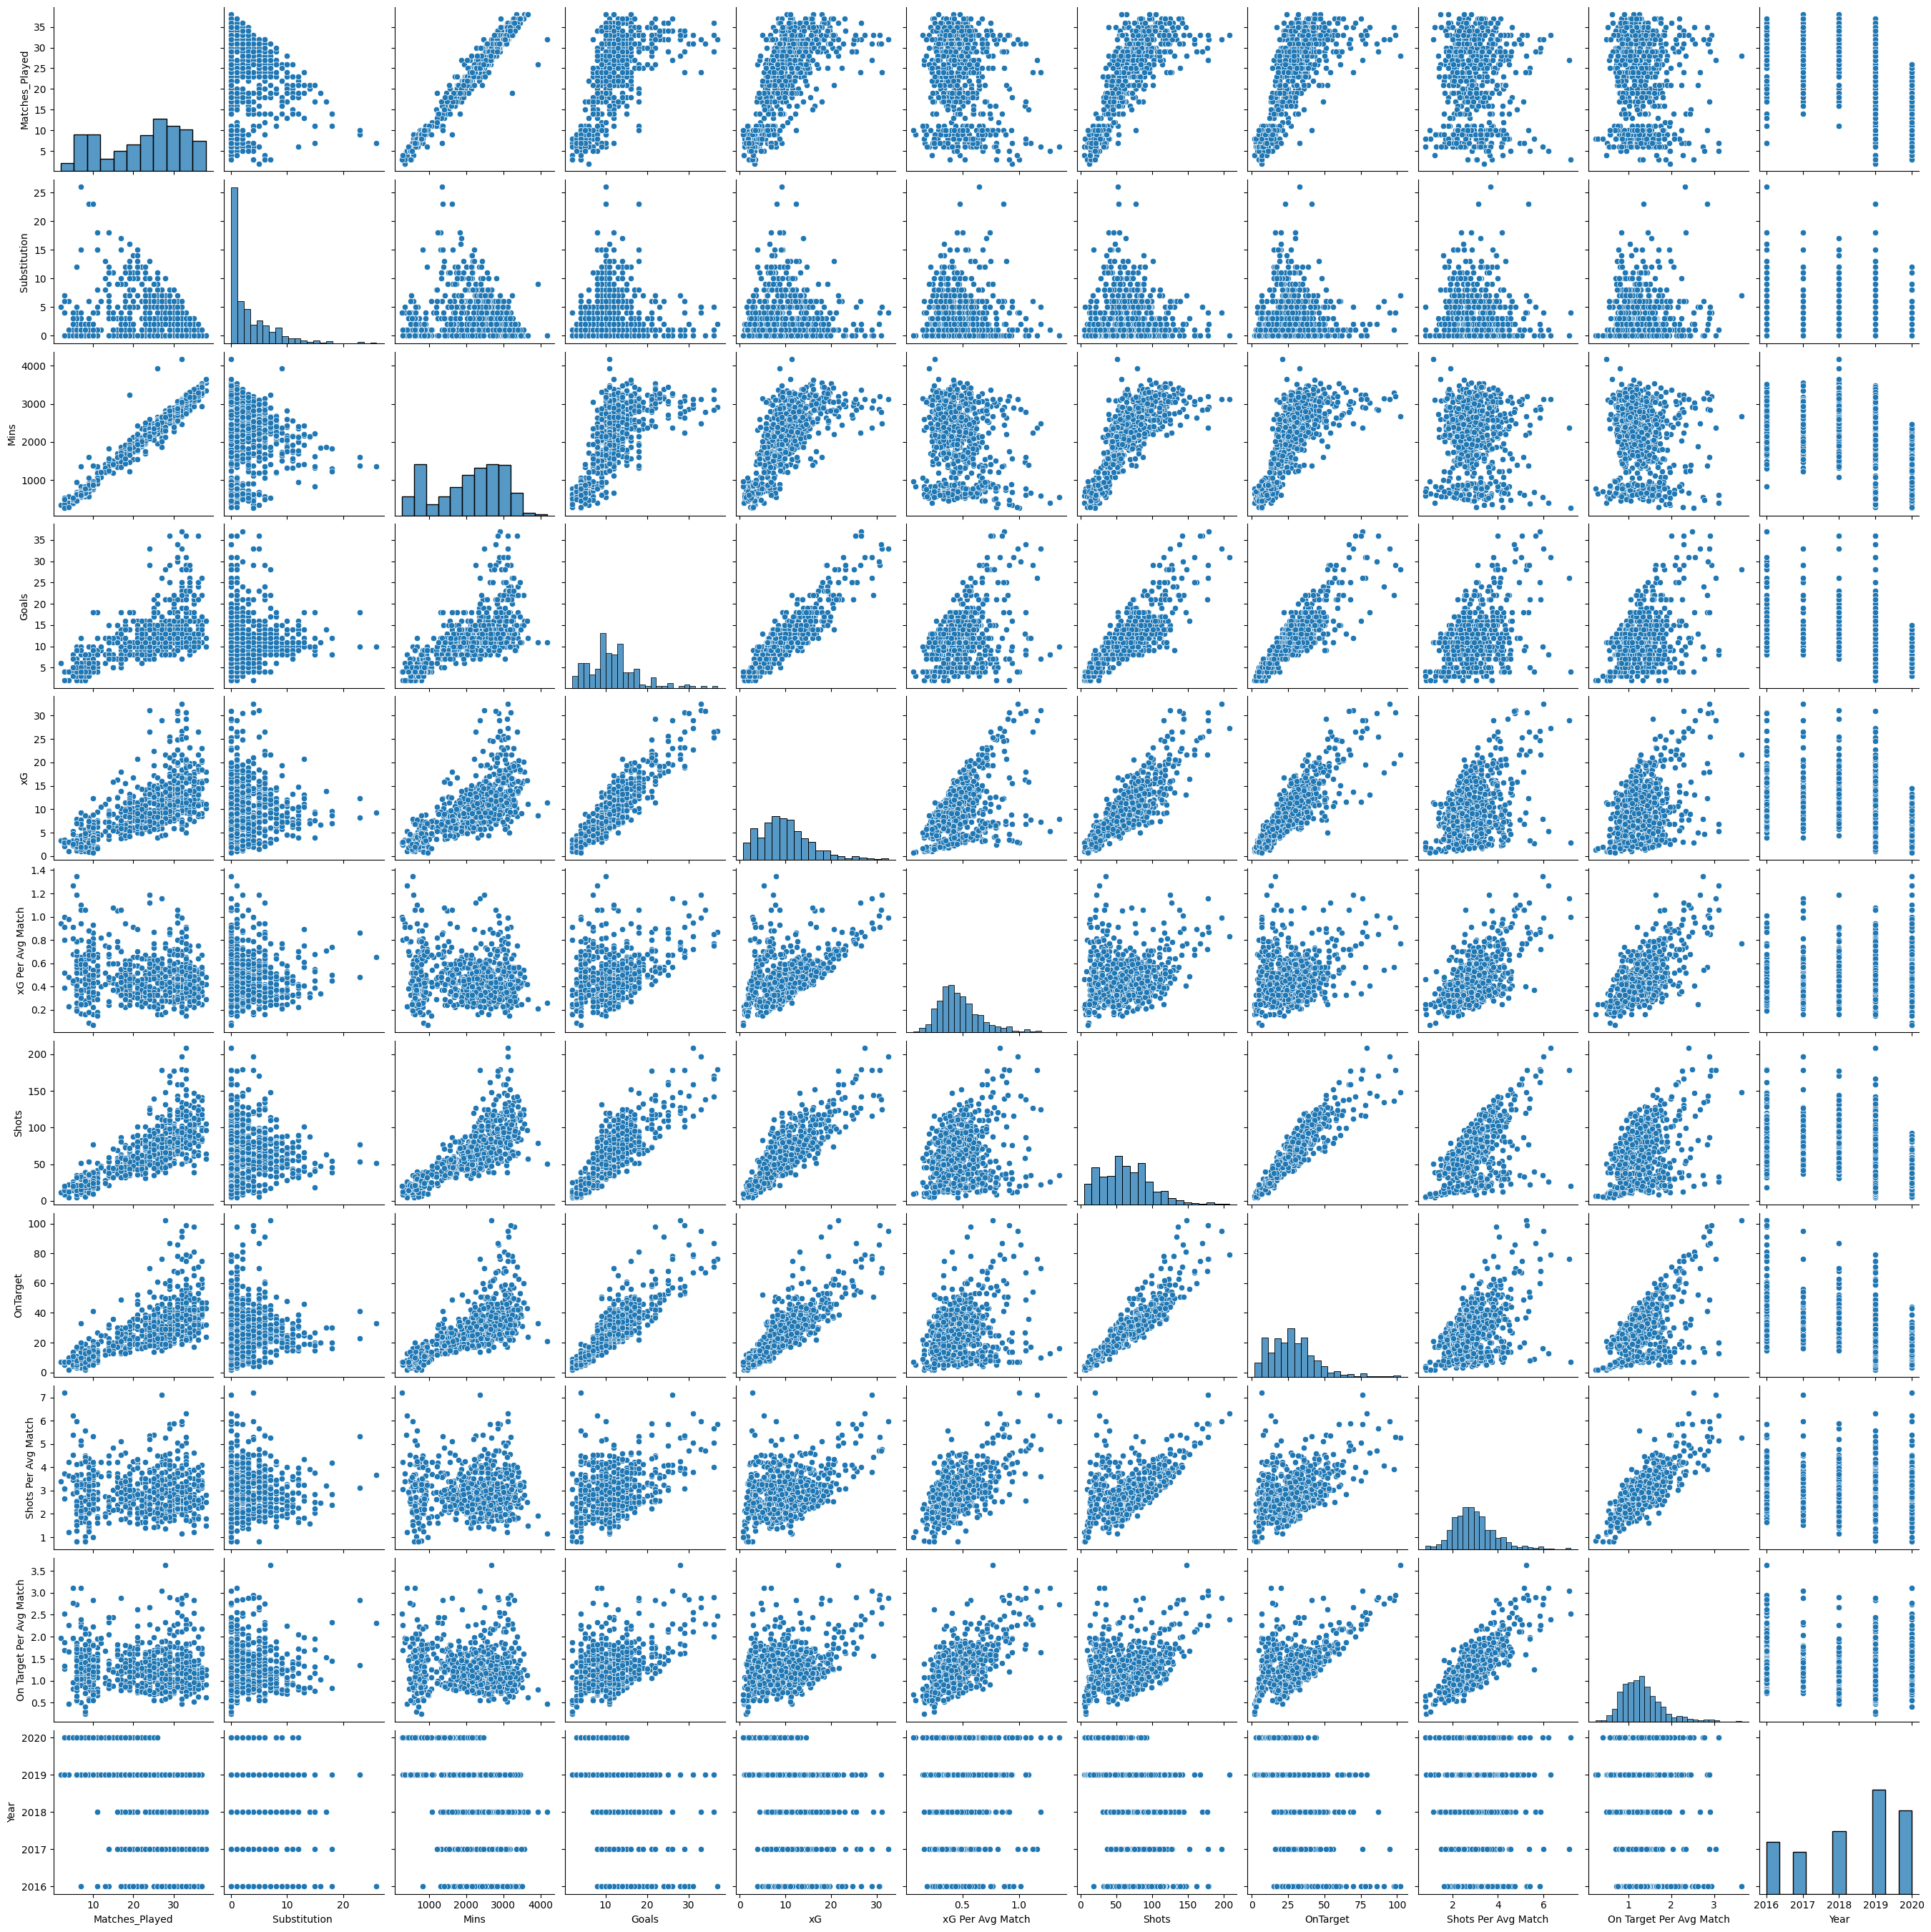

In [66]:
sns.pairplot(df)

We will try to focus on the target variable Goals and other features such as mins, Shots and Matches_Played.
* After Inspecting the Pairplot function's output:
1. Shots, Goals : Right Skewed. || mins, Matches_Played : Left Skewed.
2. We can say that there might be a polynomial relationship between target variable and mins, Matches_Played.
3. We can say also that there is a linear relationship between target variable and Shots.

In [67]:
skew_go = df["Goals"].skew()
skew_sh = df["Shots"].skew()
skew_mi = df["Mins"].skew()
skew_mp = df["Matches_Played"].skew()


print("Skeweness of Goals", skew_go)
print("Skeweness of Shots", skew_sh)
print("Skeweness of Mins", skew_mi)
print("Skeweness of Matches Played", skew_mp)

Skeweness of Goals 1.1813349570335692
Skeweness of Shots 0.6761502445778516
Skeweness of Mins -0.3573606633436241
Skeweness of Matches Played -0.36923940816407375


A range of (-1, 1) is acceptable for Skeweness

Skewness of transformed data:  -0.413246259328229


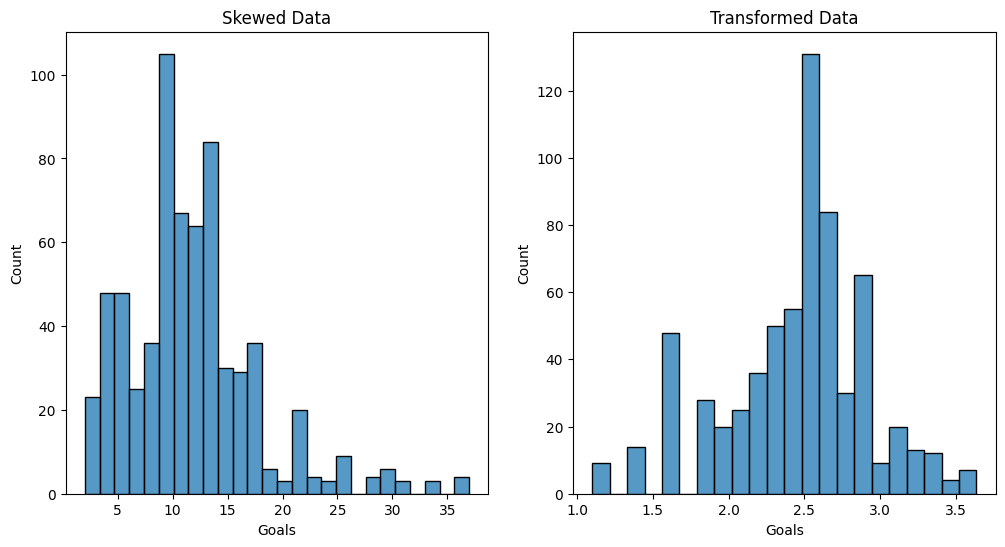

In [68]:
# Transform right skewed to normally distributed using log transformation
trans_go = np.log1p(df["Goals"])
print("Skewness of transformed data: ", trans_go.skew())

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df.Goals, ax=ax[0])
ax[0].set_title('Skewed Data')

sns.histplot(trans_go, ax=ax[1])
ax[1].set_title('Transformed Data')

plt.show()

In [69]:
df["Goals"] = trans_go

# Hypothesis Testing

We will formulate 3 Hypothesis :
1. There is no significant difference in goals contribution between CR7 and LM10.
2. There is no significant difference in goals between leagues.
3. The number of minutes played has no significant impact on the number of goals scored.

* Comparison Between CR7 and LM10:

1. Null Hypothesis (H0): There is no significant difference in goals contribution between Cristiano Ronaldo (CR7) and Lionel Messi (LM10).
2. Alternative Hypothesis (H1): There is a significant difference in goals contribution between Cristiano Ronaldo (CR7) and Lionel Messi (LM10).

* Comparison Between Leagues:

1. Null Hypothesis (H0): There is no significant difference in the number of goals scored across different leagues.
2. Alternative Hypothesis (H1): There is a significant difference in the number of goals scored across different leagues.

* Impact of Minutes Played on Goals:

1. Null Hypothesis (H0): The number of minutes played has no significant impact on the number of goals scored.
2. Alternative Hypothesis (H1): The number of minutes played has a significant impact on the number of goals scored.

I will chose The first Hypothesis which is the Comparison between Cristiano Ronaldo and Lionel Messi. 

1. Difference in Goals Contribution Between CR7 and LM10
- Type of Data: Continuous (number of goals).
- Number of Groups: Two (CR7 and LM10).
2. Test to Use:

- Independent Samples t-Test: If we assume that the goals contributed by CR7 and LM10 are normally distributed and have similar variances, we can use an independent t-test to compare the means.

3. Assumptions:
- The data should be approximately normally distributed.
- The variances between the two groups should be similar (homogeneity of variance).

### 1. Checking Normality

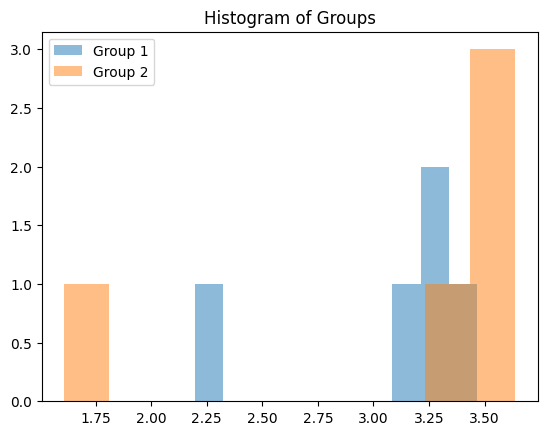

In [72]:
cr7 = df[df["Player Names"] == "Cristiano Ronaldo"]["Goals"]
lm10 = df[df["Player Names"] == "Lionel Messi"]["Goals"]

plt.hist(cr7, bins=10, alpha=0.5, label='Group 1')
plt.hist(lm10, bins=10, alpha=0.5, label='Group 2')
plt.legend()
plt.title('Histogram of Groups')
plt.show()

The two groups distributions aren't normally distributed so we will use the Mann-Whitney test

In [78]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(cr7, lm10, alternative='two-sided')
print('Mann-Whitney U Test statistic:', stat)
print('Mann-Whitney U Test p-value:', p_value)

Mann-Whitney U Test statistic: 7.5
Mann-Whitney U Test p-value: 0.345741825860727


* Based on your results:

1. Mann-Whitney U Test statistic: 7.5
2. p-value: 0.346
* Interpretation:
p-value = 0.346: This is greater than the typical significance level of 0.05.
* Conclusion:
Fail to reject the null hypothesis: Since the p-value is greater than 0.05, you do not have enough evidence to reject the null hypothesis. This means that there is no statistically significant difference in the number of goals scored between CR7 and LM10 based on this test.